In [119]:
import numpy as np
import pandas as pd

In [120]:
df = pd.read_csv(train_path)
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# EDA 

In [121]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

**Process**
1. Check Nulls
2. Check Variable Type(Numerical, Categorical)
    1. For Categorical, Check Number of Unique Values
    2. Check Which brand is expensive, which isn't. 
3. Fill Nulls

In [122]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [123]:
print("Total Different Car Brands: {0}".format(df["brand"].nunique()))
print("Total Different Fuel Types: {0}".format(df["fuel_type"].nunique()))
print("Total Different Transmission Types: {0}". format(df["transmission"].nunique()))

Total Different Car Brands: 57
Total Different Fuel Types: 7
Total Different Transmission Types: 52


In [124]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [125]:
df.groupby(by="brand")["model"].unique()

brand
Acura            [ILX Premium Package, TLX, RDX w/A-Spec Packag...
Alfa             [Romeo Stelvio Ti Sport, Romeo Giulia Base, Ro...
Aston            [Martin Vantage GT Base, Martin Vantage Base, ...
Audi             [A6 2.0T Sport, A8 L 3.0T, S4 3.0T Premium Plu...
BMW              [M4 Base, 528 i xDrive, 330 i xDrive, 328 xi, ...
Bentley          [Continental GTC Base, Continental GT Base, Co...
Bugatti                                  [Veyron 16.4 Grand Sport]
Buick            [Enclave Premium, Envision Essence, Enclave Es...
Cadillac         [Escalade ESV Platinum, Escalade Platinum, CTS...
Chevrolet        [Silverado 2500 LT, Silverado 1500 1LZ, Camaro...
Chrysler         [Town & Country Touring-L, 300C Base, Crossfir...
Dodge            [Ram 1500 Laramie Mega Cab, Durango GT, Dakota...
FIAT             [500X Trekking Plus, 500 Sport, 500 Lounge, CT...
Ferrari          [911 GT2 RS, F12berlinetta Base, 812 Superfast...
Ford             [F-150 XLT, Mustang Premium, F-250 XLT,

In [126]:
df.groupby(by="model")["model_year"].unique()

model
124 Spider Abarth                                  [2014, 2021, 2017, 2015]
128 i                      [2013, 2011, 2016, 2015, 2012, 2014, 2018, 2007]
135 i                     [2007, 2013, 2014, 2011, 2012, 2005, 2008, 200...
135 is                    [2015, 2011, 2006, 2022, 2014, 2016, 2012, 201...
1500 Big Horn             [2023, 2021, 2020, 2015, 2022, 2019, 2016, 201...
                                                ...                        
i8 Base                   [2014, 2019, 2018, 2015, 2020, 2016, 2023, 202...
tC Anniversary Edition    [2013, 2007, 2014, 2016, 2011, 2008, 2017, 200...
tC Base                          [2013, 2014, 2011, 2010, 2015, 2007, 2016]
tC Release Series 6.0     [2010, 2014, 2009, 2007, 2011, 2013, 2008, 201...
xB Base                                [2007, 2013, 2010, 2009, 2008, 2015]
Name: model_year, Length: 1897, dtype: object

# Data Analysis

In [127]:
# Box plot for each brand. 
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
models = [df[df["brand"] == current_model]["price"] for current_model in df["brand"].unique()]

Text(0.5, 1.0, 'Box plot for Brand Prices.')

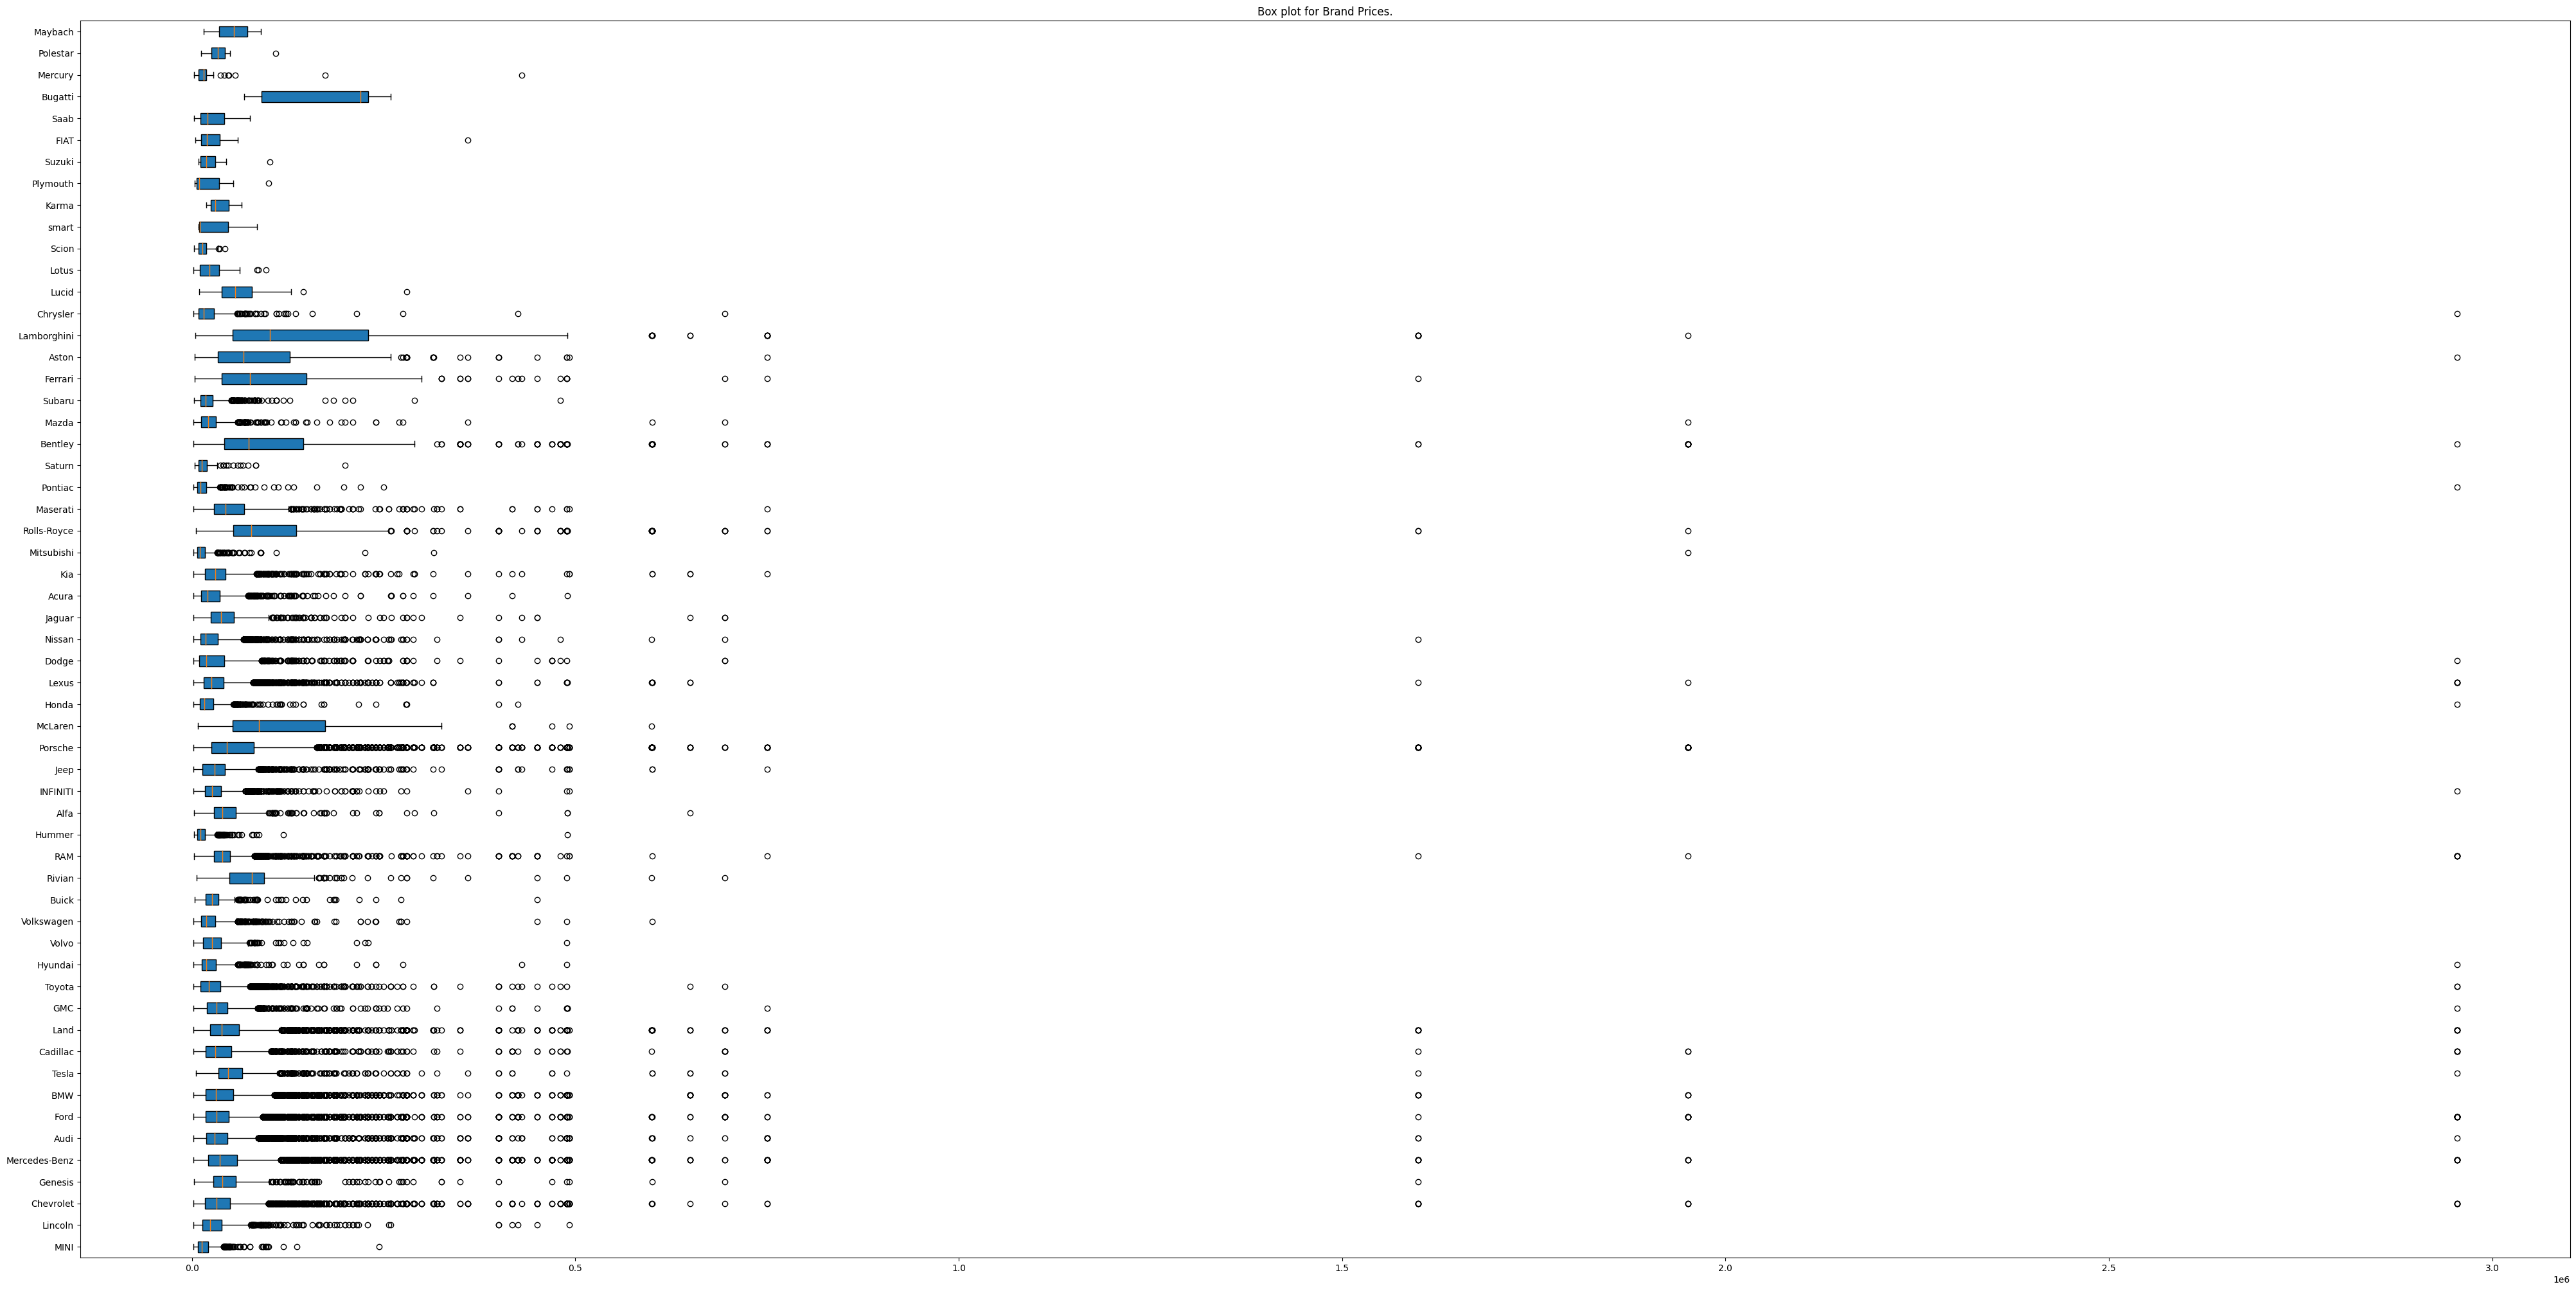

In [129]:
fig = plt.figure(figsize =(50, 25))
ax = fig.add_subplot(111)

ax.boxplot(models, vert = 0, patch_artist = True)
ax.set_yticklabels(df["brand"].unique())


plt.title("Box plot for Brand Prices.")

In [141]:
# Box plot for Luxury Brand. 

# 1. Find Brands that have pricey cars (Prices in the 90th quantile)
luxury_brands = df[df["price"] >= df["price"].quantile(0.80)]["brand"].unique()
luxury_brand_prices = [df[df["brand"] == brands]["price"] for brands in luxury_brands]


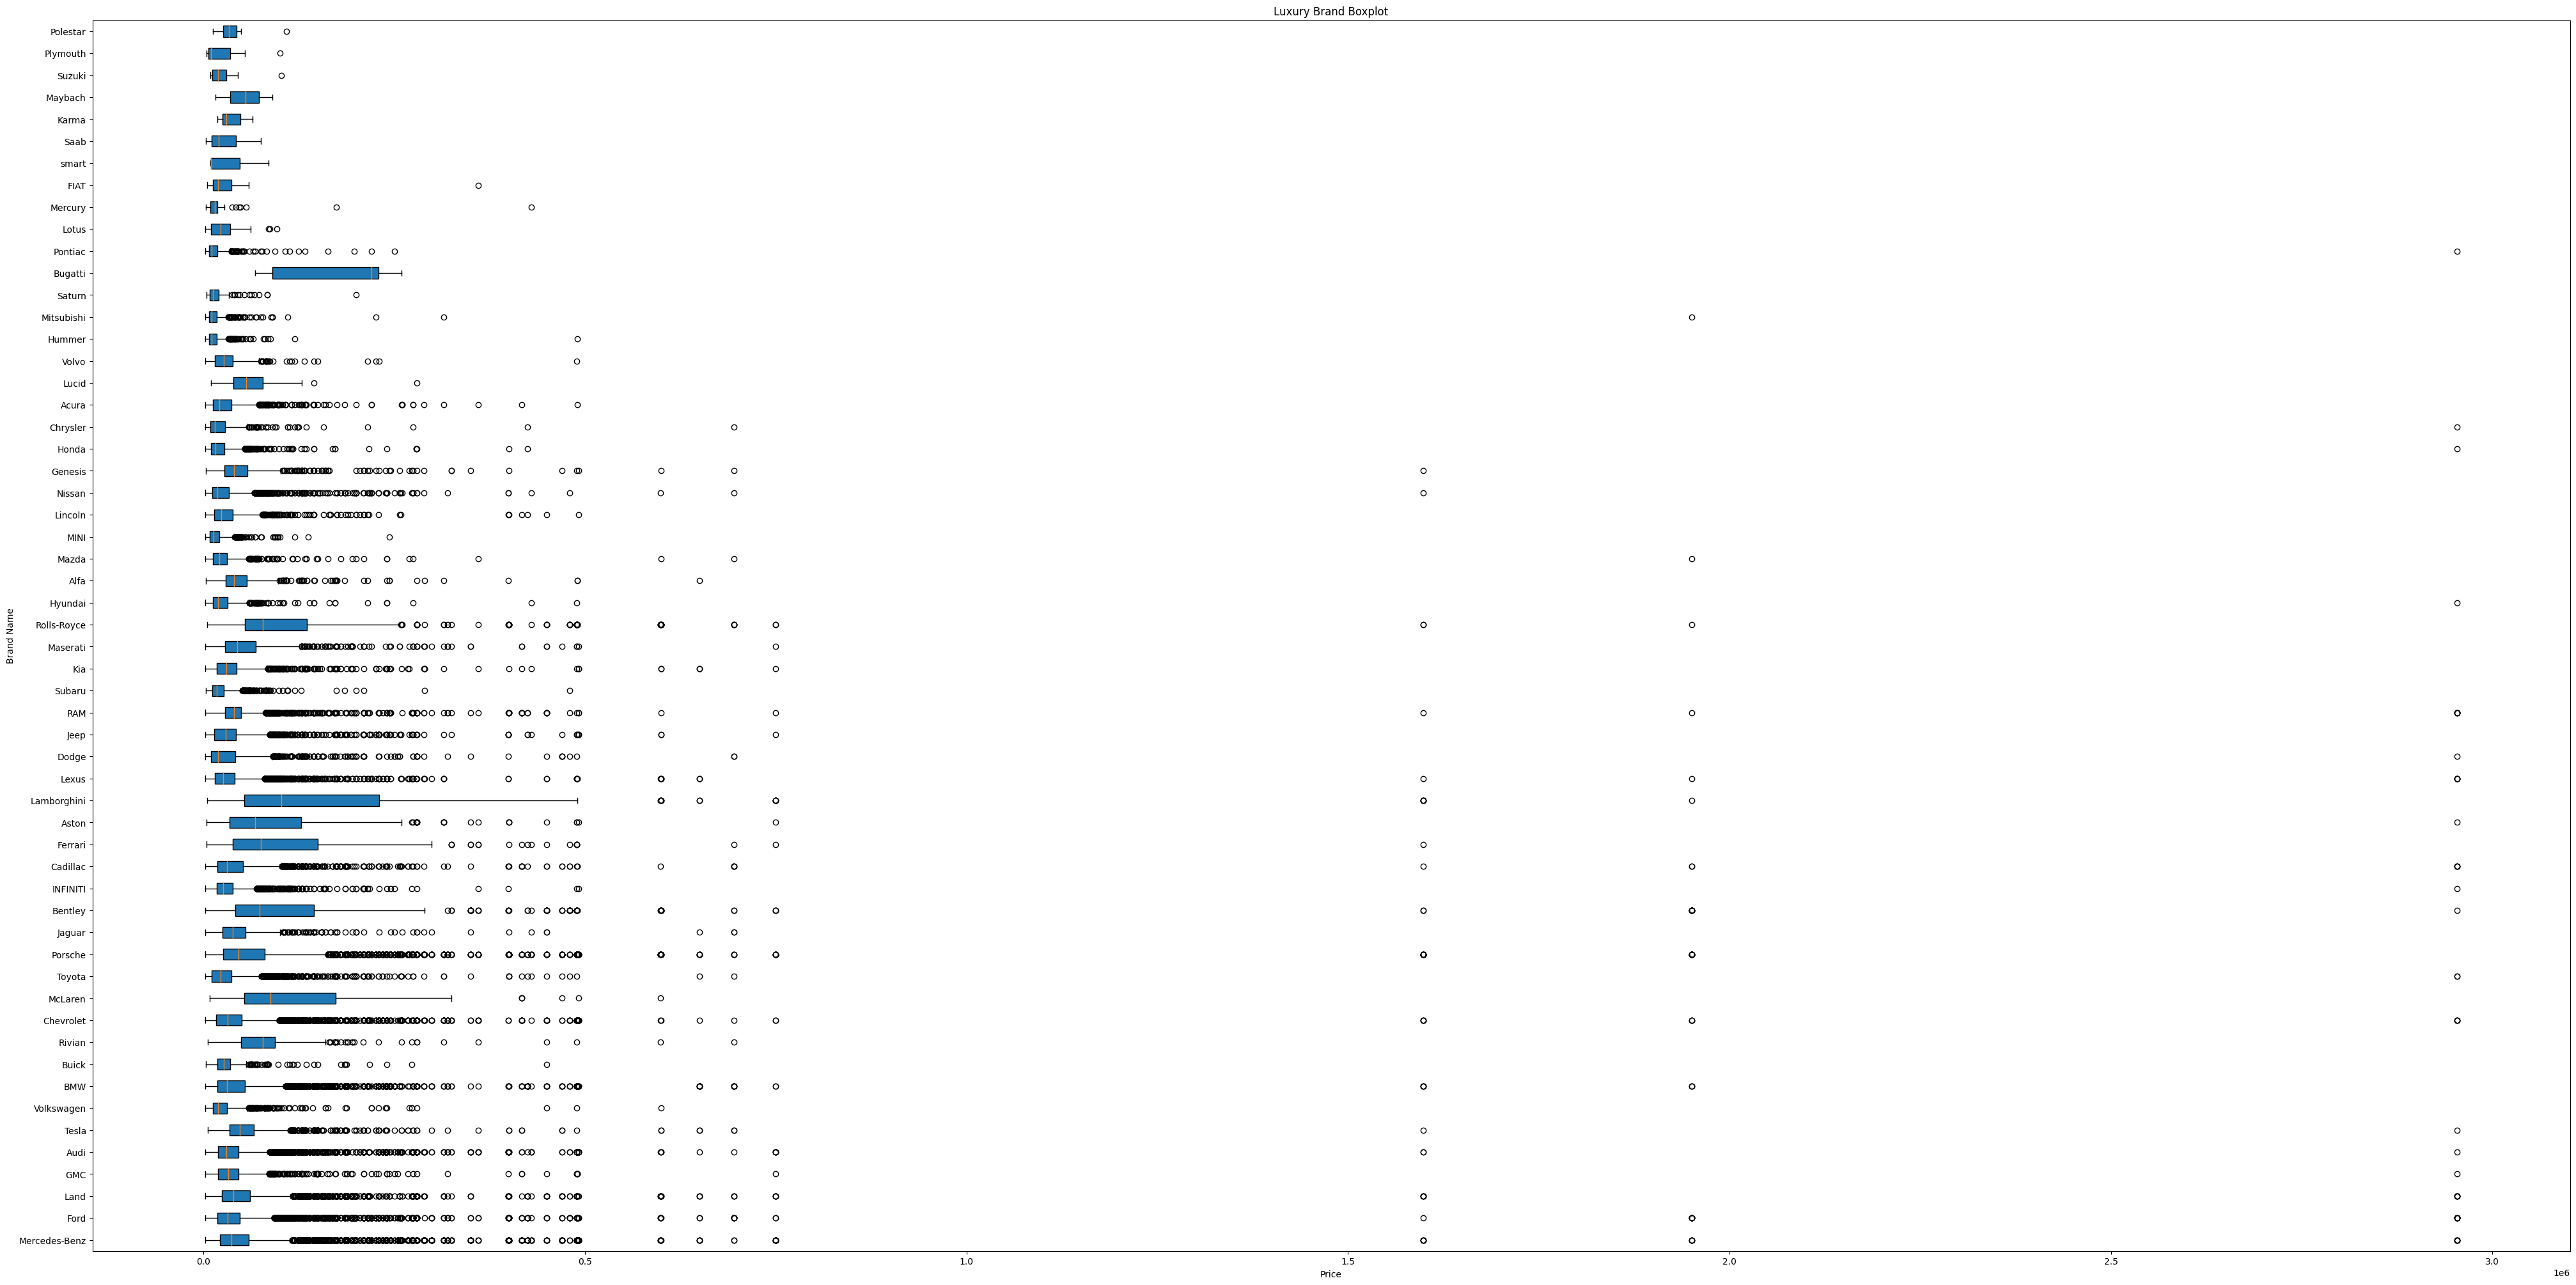

In [148]:
# 2. BoxPlot 

fig = plt.figure(figsize=(50,25))
ax = fig.add_subplot(111)

ax.boxplot(luxury_brand_prices, vert = 0, patch_artist = True)
ax.set_yticklabels(luxury_brands)


plt.xlabel("Price")
plt.ylabel("Brand Name")
plt.title("Luxury Brand Boxplot")
plt.show()

In [163]:
normal_line = dict(df.groupby(by="brand")["model"].count())
luxury_line = dict(df[df["price"] >= df["price"].quantile(0.9)].groupby(by="brand")["model"].count())

temp_df = dict()

# Analysis: What Percentage of models of each brand is considered luxury.... If the price of the model is in the +90th perentile it is a luxury line. 
for k, v in normal_line.items():
    if k in luxury_line.keys():
        luxury_ratio = normal_line[k] / luxury_line[k]
        temp_dict = {"Brand": k, "Luxury ratio": luxury_ratio}
    else:
        temp_dict = {"Brand": k, "Luxury ratio": 0}
        
    temp_df = pd.concat([temp_df, pd.DataFrame(temp_dict)], ignore_index = True)
        

ValueError: If using all scalar values, you must pass an index

**Observations**
* Each Brand has different Models.
* Each Model has different model years(versions).
* 7 different fuel types. 
* 52 different Transmission types.

Categorical Encoding? If OHE, Will be sparse. (Will try both)

**Ideas**
* Add a new feature called luxury brand(Binary), because there are a lot of outliers. 
* Use a tree based model, With boosting perhaps? Other regression models might overfit, and may not take outliers into consideration. 

If Doing OHE, try PCA afterwards.